# **Movie Recommendation System Based On Content & Popularity**

Step into the realm of cinematic wonders, where you'll embark on an enthralling journey through the world of movie recommendation systems. Just as film enthusiasts rely on platforms like MovieLens to discover their favorite films and explore new genres, you'll become a cinematic virtuoso, ready to unlock the hidden treasures within this vast sea of movie data.

Your adventure begins with a mission as crucial as setting the stage for a blockbuster movie—cleaning the dataset. Picture yourself as the director, meticulously ensuring that every scene is perfectly framed, preparing the data for a cinematic masterpiece. It's all about creating the ideal canvas for a data-driven cinematic saga.

Once the dataset shines brightly, you'll plunge into the heart of this cinematic universe—data analysis. Here, you become the film critic, deciphering what makes a movie resonate with viewers, spotting trends in cinematic tastes, and unveiling the secrets behind audience preferences. This journey is all about transforming raw data into captivating cinematic insights.

As the project unfolds, you'll emerge as the unsung hero behind the scenes. Just like a bustling film crew working tirelessly to create unforgettable scenes, your work will enhance the movie discovery experience for film enthusiasts. Your insights will help movie buffs discover the perfect films for every mood, and filmmakers will gain valuable insights to craft better cinematic experiences.

In this world of data-driven cinema, you are the director, the data wizard, and the storyteller. Your dedication to cleaning, analyzing, and implementing recommendation algorithms adds to the magic of movie discovery, making every viewing experience extraordinary. Your journey is one of data, cinema, and endless possibilities.

This project is your opportunity to delve into the fascinating realm of recommendation algorithms, including content-based, popularity-based, and collaborative filtering methods. Armed with two MovieLens datasets, you'll unravel the secrets of cinematic preference and provide movie enthusiasts with tailored recommendations that will leave them spellbound. Get ready to embark on this interactive cinematic data adventure, where you will craft cinematic insights and unlock the true potential of these captivating datasets.

In [1]:
#--- Import Pandas ---
import pandas as pd

#--- Read in dataset ----
movies = pd.read_csv('movies.csv')

#--- Inspect data ---
movies.head()

C:\Users\raisi\AppData\Local\Temp\ipykernel_1540\1047275340.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#--- Read in dataset ----
credits = pd.read_csv("./credits.csv")

#--- Inspect data ---
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
# Merging the two dataframes
df = pd.merge(movies, credits, on="title")

#--- Inspect data ---
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Data Transformation.

Modify the 'genres' column in the DataFrame 'df' by applying the function 'convert_json_to_array' to parse and convert JSON data into an array format.

Modify the 'keywords' column in the DataFrame 'df' by applying the function 'convert_json_to_array' to parse and convert JSON data into an array format.
Update the 'cast' column in the DataFrame 'df' by applying the 'update_cast' function with 'order' as the parameter, limiting the number of cast members to 5.

Update the 'crew' column in the DataFrame 'df' by applying the 'update_crew' function with 'job' as the parameter, filtering the crew members based on specific job roles (e.g., 'Screenplay', 'Producer', 'Editor', 'Writer', 'Director').

Display the modified 'df' DataFrame after the above data processing steps.

In [5]:
from typing import List
import ast



def convert_json_to_array(json_string: str):
    names = []

    array = ast.literal_eval(json_string)
    for item in array:
        names.append(item['name'] or None)

    return names


def convert_array_to_string(array: List):
    return ' '.join(array).lower()


def update_cast(key: str, value:  int):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip().lower())
        return result
    return inner_function


def update_crew(key: str, values: List[str]):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] in values:
                result.append(item['name'].strip().lower())
        return result
    return inner_function


def combine_all_features(features: List[str]):
    def inner_function(series: pd.core.series.Series):
        result = ''
        for feature in features:
            result += (' '.join(series[feature]) + ' ')
        return result
    return inner_function

df['genres'] = df['genres'].apply(convert_json_to_array)
df['keywords'] = df['keywords'].apply(convert_json_to_array)
df['cast']=df['cast'].apply(update_cast('order',5))
df['crew']=df['crew'].apply(update_crew('job',['Screenplay', 'Producer', 'Editor', 'Writer', 'Director']))

#--- Inspect data ---
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."


## Data Cleaning and Preprocessing.
Remove columns in the 'df' DataFrame, including 'homepage', 'original_language', 'overview', 'id', 'spoken_languages', 'status', 'tagline', 'movie_id', 'production_companies', and 'production_countries', using the 'drop' method with the parameters 'axis=1' to indicate column removal and 'inplace=True' to modify the DataFrame in place.

Remove rows with missing values (NaN) from the 'df' DataFrame using the 'dropna' method with the 'inplace=True' parameter.

Display the modified 'df' DataFrame.

In [6]:
df.drop(['homepage', 'original_language', 'overview', 'id', 'spoken_languages', 'status', 'tagline', 'movie_id', 'production_companies', 'production_countries'], axis=1, inplace=True)
df.dropna(inplace = True)

#--- Inspect data ---
df.head()

,budget,genres,keywords,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[sam worthington, zoe saldana, sigourney weave...","[stephen e. rivkin, james cameron, james camer..."
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[johnny depp, orlando bloom, keira knightley, ...","[gore verbinski, jerry bruckheimer, ted elliot..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[daniel craig, christoph waltz, léa seydoux, r...","[sam mendes, john logan, lee smith, barbara br..."
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[christian bale, michael caine, gary oldman, a...","[charles roven, christopher nolan, christopher..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[taylor kitsch, lynn collins, samantha morton,...","[andrew stanton, andrew stanton, colin wilson,..."


## Decade-Wise Movie Count Calculation.
Use the dropna() method to remove missing values from the 'release_date' column.

Apply a lambda function to extract the decade from the 'release_date'.

Convert the year to an integer, divide by 10, round down to the nearest decade, multiply by 10, and append 's' to represent the decade.

Use the provided count_pie method by calling it on the result of the lambda function.

Store the result in the variable 'res'.

Round the result (res) to three decimal places using the round() function.

Store the rounded result in the variable result.
The final result is stored in the variable result.

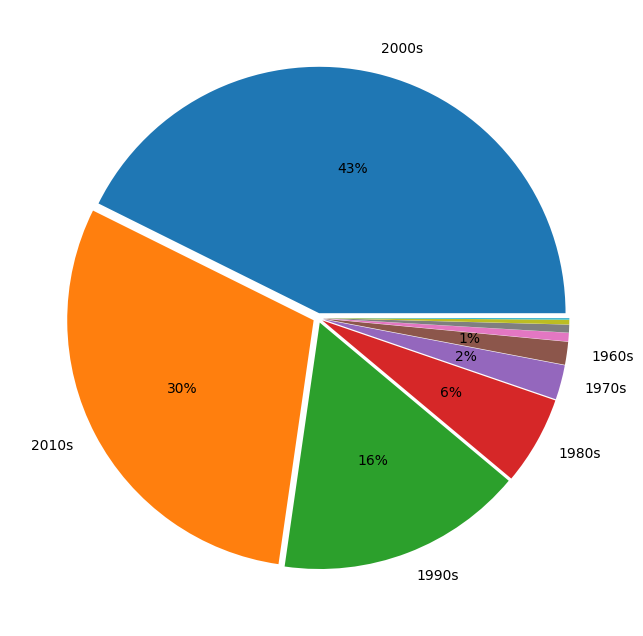

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
def count_pie(series):
    counts = series.value_counts()
    counts = counts/counts.sum()
    labels = ['' if num < 0.01 else str(year)
              for (year, num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] <
               100 else 0.001 for i in range(counts.size)]
    plt.pie(counts, labels=labels, autopct=lambda x: '{:1.0f}%'.format(
        x) if x > 1 else '', explode=explode)
    # plt.show()
    return counts

df['release_date'].dropna(inplace=True)
temp_dates = df['release_date'].apply(lambda x: str((int(x[0:4])//10)*10)+'s')

#--- Inspect data ---
res = count_pie(temp_dates)
result = round(res,3)

## Genre Analysis and Visualization.

Create a Pandas Series 'series' by selecting the 'genres' column from the DataFrame 'df'.

Set the Seaborn style to "whitegrid" using 'sns.set(style="whitegrid")'.

Initialize an empty list 'total_genres' to store all the genres from the 'genres' column.

Iterate through the 'genres' column and extend 'total_genres' with each row's list of genres

Create a list of unique genres by converting 'total_genres' into a set and then back to a list.

Initialize an empty list 'values1' to store genre names and their corresponding genre counts.

Use 'append' to add names and genre counts to 'values1'.

Sort 'values1' in descending order based on the genre counts.

Create an empty dictionary 'dictionary' to store the top 30 genres and their counts.

Create a bar plot using Matplotlib with a specified figure size, rotated x-axis labels, and font size.

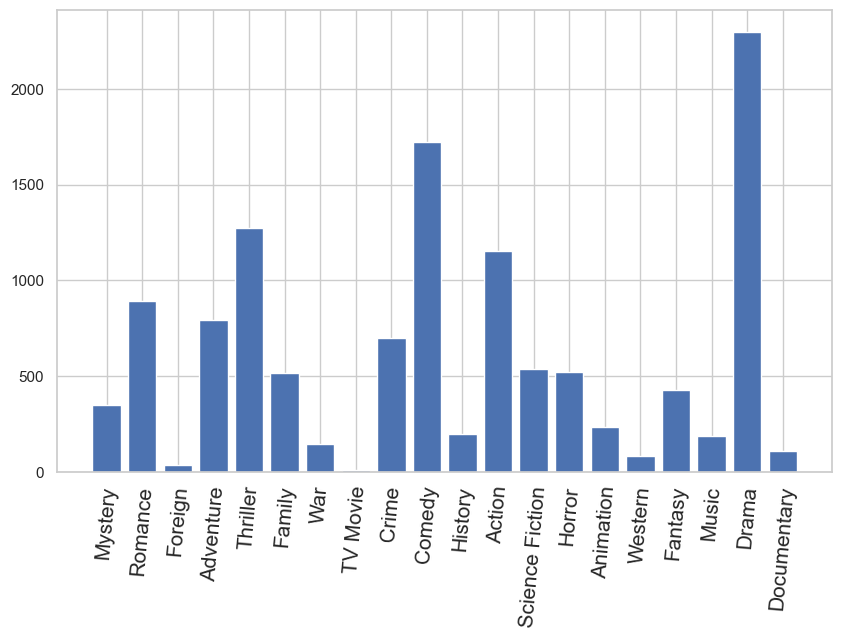

[('Drama', 2299),
 ('Comedy', 1723),
 ('Thriller', 1275),
 ('Action', 1156),
 ('Romance', 895),
 ('Adventure', 792),
 ('Crime', 697),
 ('Science Fiction', 538),
 ('Horror', 520),
 ('Family', 514),
 ('Fantasy', 425),
 ('Mystery', 348),
 ('Animation', 234),
 ('History', 197),
 ('Music', 185),
 ('War', 144),
 ('Documentary', 109),
 ('Western', 82),
 ('Foreign', 34),
 ('TV Movie', 8)]

In [13]:
series = df.genres
sns.set(style="whitegrid")
total_genres=[]

series.apply(lambda x: total_genres.extend(x))
unique_genres = list(set(total_genres))

values1 = []
genre_series = pd.Series(total_genres)
for i in unique_genres:
    count = sum(genre_series == i)
    values1.append((i, count))
    
values1
dictionary = {}
for item in values1[:30]:
    dictionary[item[0]] = item[1]

values1 = sorted(values1, key=lambda x: x[1], reverse= True)
    
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()

#--- Inspect data ---
values1

## Keyword Analysis and Visualization.

Create a Pandas Series 'series' by selecting the 'keywords' column from the DataFrame 'df'.

Set the Seaborn style to "whitegrid" using 'sns.set(style="whitegrid")'.

Initialize an empty list 'total_keywords' to store all the keywords from the 'keywords' column.

Use a for loop to iterate over the elements in 'series', extending the 'total_keywords' list with the keywords from each entry.

Create a list of unique keywords by converting 'total_keywords' into a set and then back to a list, resulting in 'unique_keywords'.

Initialize an empty list 'values2' to store keyword counts and their corresponding keyword names.

Iterate over the unique keywords and count the occurrences of each keyword in 'total_keywords', then append the keyword name and count as a tuple to 'values2'.

Sort 'values2' in descending order based on the keyword counts.

Create an empty dictionary 'dictionary' to store the top 30 keywords and their counts.

Iterate over the first 30 elements of 'values2' and add each keyword and its count to 'dictionary'.

Create a bar plot using Matplotlib with a specified figure size, rotated x-axis labels, and font size.

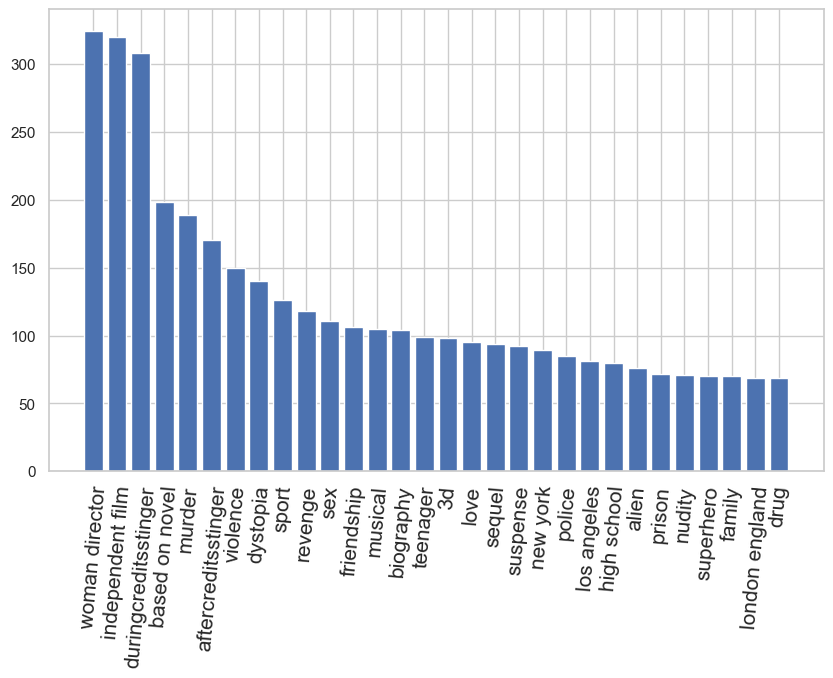

[('woman director', 324),
 ('independent film', 320),
 ('duringcreditsstinger', 308),
 ('based on novel', 198),
 ('murder', 189),
 ('aftercreditsstinger', 170),
 ('violence', 150),
 ('dystopia', 140),
 ('sport', 126),
 ('revenge', 118),
 ('sex', 111),
 ('friendship', 106),
 ('musical', 105),
 ('biography', 104),
 ('teenager', 99),
 ('3d', 98),
 ('love', 95),
 ('sequel', 94),
 ('suspense', 92),
 ('new york', 89),
 ('police', 85),
 ('los angeles', 81),
 ('high school', 80),
 ('alien', 76),
 ('prison', 72),
 ('nudity', 71),
 ('superhero', 70),
 ('family', 70),
 ('london england', 69),
 ('drug', 69),
 ('dying and death', 66),
 ('father son relationship', 65),
 ('daughter', 62),
 ('world war ii', 58),
 ('kidnapping', 57),
 ('wedding', 57),
 ('remake', 56),
 ('suicide', 56),
 ('serial killer', 56),
 ('magic', 55),
 ('friends', 54),
 ('corruption', 53),
 ('escape', 52),
 ('based on comic book', 52),
 ('hospital', 52),
 ('party', 52),
 ('time travel', 51),
 ('based on true story', 51),
 ('mart

In [14]:
from collections import Counter

series = df.keywords
sns.set(style="whitegrid")

total_keywords = []
series.apply(lambda x: total_keywords.extend(x))

keyword_counts = Counter(total_keywords)

unique_keywords = list(keyword_counts.keys())

values2 = [(keyword, keyword_counts[keyword]) for keyword in unique_keywords]

values2 = sorted(values2, key=lambda x: x[1], reverse = True)

dictionary = {}
for item in values2[:30]:
    dictionary[item[0]] = item[1]

plt.subplots(figsize=(10, 6))
plt.xticks(rotation=85, fontsize=15)
plt.bar(dictionary.keys(), dictionary.values(), align="center")
plt.show()

#--- Inspect data ---
values2

## Genre Word Cloud Visualization.

Create a Pandas Series 'series' by selecting the 'genres' column from the DataFrame 'df'.

Initialize a WordCloud object 'word_cloud' with specific settings, such as a black background, margin, width, height, text orientation preference, maximum number of words, and scaling.

Initialize an empty list 'total_genres' to store all the genres from the 'genres' column.

Use a for loop to iterate over the elements in 'series', extending the 'total_genres' list with the genres from each entry.

Create a list of unique genres by converting 'total_genres' into a set and then back to a list, resulting in 'unique_genres'.

Initialize an empty list 'values3' to store genre counts and their corresponding genre names.

Iterate over the unique genres and count the occurrences of each genre in 'total_genres', then append the genre name and count as a tuple to 'values3'.

Sort 'values3' in descending order based on the genre counts.

Create an empty dictionary 'dictionary' to store the genre names and their counts.

Iterate over the 'values' list and add each genre name and its count to 'dictionary'.

Generate a word cloud from the 'dictionary' using the 'generate_from_frequencies' method of the 'word_cloud' object.

Create a bar plot using Matplotlib with a specified figure size, no axis, and display the word cloud image.

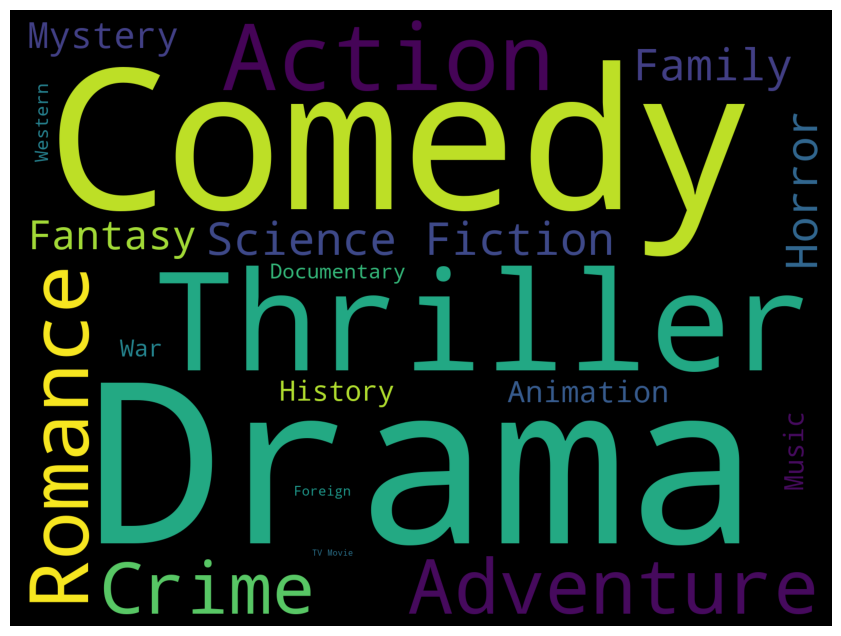

[('Drama', 2299),
 ('Comedy', 1723),
 ('Thriller', 1275),
 ('Action', 1156),
 ('Romance', 895),
 ('Adventure', 792),
 ('Crime', 697),
 ('Science Fiction', 538),
 ('Horror', 520),
 ('Family', 514),
 ('Fantasy', 425),
 ('Mystery', 348),
 ('Animation', 234),
 ('History', 197),
 ('Music', 185),
 ('War', 144),
 ('Documentary', 109),
 ('Western', 82),
 ('Foreign', 34),
 ('TV Movie', 8)]

In [15]:
series = df.genres
word_cloud = wc.WordCloud(background_color="black", margin=20, width=800,
                           height=600, prefer_horizontal=0.7, max_words=50, scale=2)

total_genres=[]

series.apply(lambda x: total_genres.extend(x))

unique_genres = list(set(total_genres))

values3 = []
genre_series = pd.Series(total_genres)

for i in unique_genres:
    count = sum(genre_series == i)
    values3.append((i, count))

values3 = sorted(values3, key=lambda x: x[1], reverse = True)

dictionary = {}
for item in values3:
    dictionary[item[0]] = item[1]

word_cloud.generate_from_frequencies(dictionary)
word_cloud.to_file('fig4.png')
plt.subplots(figsize=(16, 8))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

#--- Inspect data ---
values3

## Correlation Analysis and Visualization.

Create a subset of the DataFrame 'df' containing only the specified numeric columns: 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', and 'vote_count'. This subset is stored in the 'numeric_columns' variable.

Calculate the correlation matrix between these numeric columns using the 'corr()' method, and store the result in the 'cor' variable.

Create a Matplotlib figure with a specified figure size of (12, 10) for the heatmap.

Generate a boolean mask 'mask' using NumPy to hide the upper triangular part of the correlation matrix, as it contains duplicate information.

Define a color map 'cmap' using Seaborn's 'diverging_palette()' function with specific color parameters for visualization.

Create a heatmap of the correlation matrix using Seaborn's 'heatmap()' function. Set the 'annot' parameter to 'True' to display the correlation coefficients on the heatmap, and apply the 'mask' and 'cmap' to enhance visualization.

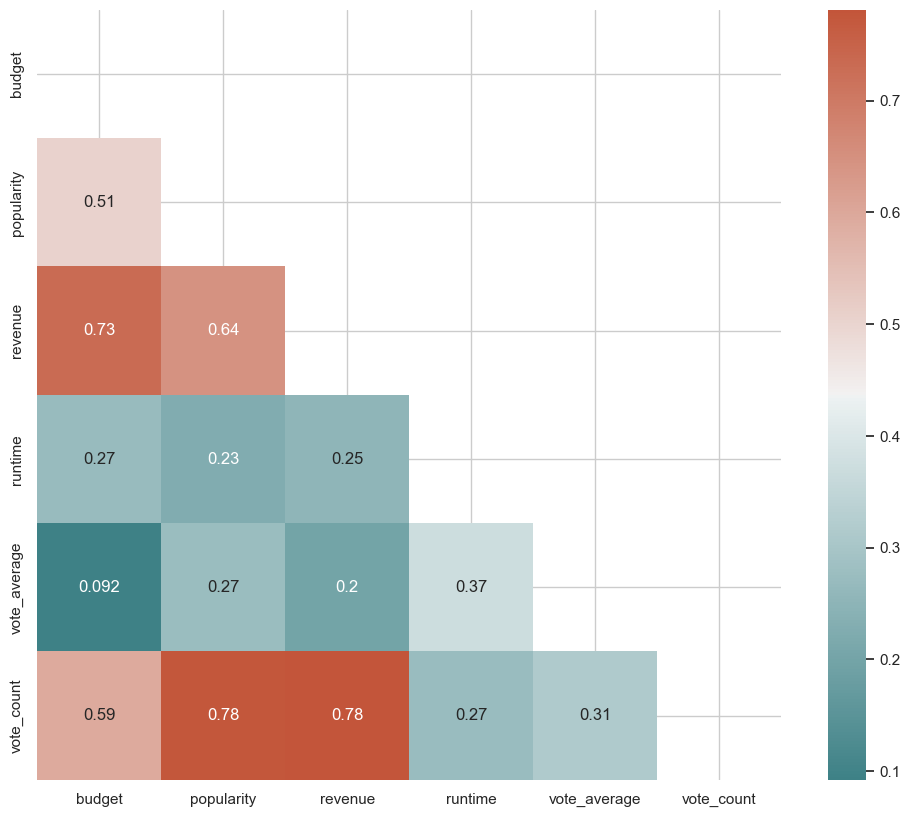

In [16]:

numeric_columns = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
# Calculate the correlation matrix
cor = numeric_columns.corr()

plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(cor, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)
plt.show()

## Feature Combination in DataFrame.

Create a new column named 'feature' in the DataFrame 'df'.

Use the 'apply' method to apply the 'combine_all_features'(provided in the Module 1, Task 4) function to each row of the DataFrame. The 'combine_all_features' function is applied with the specified columns 'genres', 'keywords', 'cast', and 'crew'.

The 'combine_all_features' function is applied along the rows (axis=1) to combine and concatenate the values from the specified columns into a single string. The result is stored in the 'feature' column for each row.

Display the modified 'df' DataFrame with the newly added 'feature' column.

In [17]:
df["feature"] = df.apply(combine_all_features(['genres', 'keywords', 'cast', 'crew']), axis=1)
df['feature']

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4804    Action Crime Thriller united states–mexico bar...
4805    Comedy Romance  edward burns kerry bishé marsh...
4806    Comedy Drama Romance TV Movie date love at fir...
4807      daniel henney eliza coupe bill paxton alan r...
4808    Documentary obsession camcorder crush dream gi...
Name: feature, Length: 4806, dtype: object

## Movie Title to DataFrame Index Mapping.

Create a Pandas Series named 'indices' to map the indices of the DataFrame 'df' to the 'title' column in the DataFrame.

Use the 'pd.Series' constructor with 'df.index' as the data and 'df['title']' as the index. This establishes a mapping of movie titles to their corresponding DataFrame indices.

Apply the 'drop_duplicates()' method to ensure that there are no duplicate entries in the 'indices' Series.

The 'indices' Series contains a mapping of movie titles to their respective DataFrame indices.

In [18]:
indices = pd.Series(df.index, index=df["title"])
indices.drop_duplicates(inplace=True)
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4806, dtype: int64

## Movie Recommendation Based on Cosine Similarity with TF-IDF.

Import necessary modules from the scikit-learn library for text vectorization and similarity calculation, including 'CountVectorizer,' 'TfidfVectorizer,' and 'cosine_similarity.'

Initialize a 'TfidfVectorizer' named 'tfidf' and specify 'stop_words' as 'english' to remove common English words from the text data.

Create a 'tfidf_matrix' by applying the 'fit_transform' method to the 'feature' column of the DataFrame 'df' using the 'tfidf' vectorizer. This matrix represents the TF-IDF (Term Frequency-Inverse Document
Frequency) values for each movie's features.

Calculate the cosine similarity between the movies based on the 'tfidf_matrix' and store the result in 'cosine_sim_tfidf.'

Determine the index of the movie with the given 'title' by looking it up in the 'indices' Series.

Generate a list of similarity scores for the movie with the given 'title' by enumerating through 'cosine_sim_tfidf' at the index corresponding to the movie.

Sort the similarity scores in descending order to identify the most similar movies. Exclude the first entry, which is the movie itself, and select the next 10 most similar movies.

Extract the indices of the 10 most similar movies to obtain movie recommendations and store them in the 'movie_indices' list.

Retrieve the titles of the recommended movies using 'iloc' and store them in the 'recommend1' variable.

In [21]:
title = 'Avatar'
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['feature'])
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

index = indices[title]

similarity_scores = list(enumerate(cosine_sim_tfidf[index]))
similarity_scores = sorted( similarity_scores, key= lambda x: x[1] ,reverse= True)

movie_indices = [i for i,v in similarity_scores[1:11]]

recommend1 = df.iloc[movie_indices]['title']
recommend1

2405                        Aliens
25                         Titanic
838                         Alien³
575                    Vanilla Sky
279     Terminator 2: Judgment Day
278             Planet of the Apes
902                  Jerry Maguire
2200                       Lockout
1349                         Aloha
3161                         Alien
Name: title, dtype: object

## Movie Recommendation Based on Cosine Similarity with CountVectorizer.

Create a 'CountVectorizer' named 'count' to convert text data into a matrix of word counts. Specify 'stop_words' as 'english' to exclude common English words.

Generate a 'count_matrix' by applying the 'fit_transform' method to the 'feature' column of the DataFrame 'df' using the 'count' vectorizer. This matrix represents the word counts for each movie's features.

Calculate the cosine similarity between the movies based on the 'count_matrix' and store the result in 'cosine_sim_count.'

Determine the index of the movie with the given 'title' by looking it up in the 'indices' Series.

Create a list of similarity scores for the movie with the given 'title' by enumerating through 'cosine_sim_count' at the index corresponding to the movie.

Sort the similarity scores in descending order to identify the most similar movies. Exclude the first entry, which is the movie itself, and select the next 10 most similar movies.

Extract the indices of the 10 most similar movies to obtain movie recommendations and store them in the 'movie_indices' list.

Retrieve the titles of the recommended movies using 'iloc' and store them in the 'recommend2' variable.

In [22]:
count = CountVectorizer(stop_words='english')

count = CountVectorizer(stop_words='english')

count_matrix = count.fit_transform(df['feature'])

cosine_sim_count = cosine_similarity(count_matrix, count_matrix)

index = df[df['title'] == title].index[0]

similarity_scores = list(enumerate(cosine_sim_count[index]))

sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:]

movie_indices = [i[0] for i in sorted_scores[:10]]

recommend2 = df.iloc[movie_indices]['title']

recommend2

2405                        Aliens
25                         Titanic
279     Terminator 2: Judgment Day
2200                       Lockout
282                      True Lies
1003                       The One
3442                The Terminator
94         Guardians of the Galaxy
587                      The Abyss
902                  Jerry Maguire
Name: title, dtype: object